In [1]:
#General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Astropy imports
from astropy import cosmology
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo
import astropy.constants as const

#Own code imports
from diffuse_ulirg_extrapolation import(
    LoadSources,
    QIR,
    nu_flux
)

In [2]:
ULIRGs = LoadSources('./',catalog_file= "ULIRG_selection.txt")
data = pd.DataFrame(ULIRGs)


Loading ULIRGs with z <= 1 and sinDec >= -1.0

LOADED: 189 ULIRGs


In [3]:
data[data['redshift']<=0.13].sort_values(by = 'redshift')

,name,ra,dec,sinDec,redshift,distance,f60,unc_f60,log_lum_IR,catalog
133,ARP 220,4.079507,0.410207,0.398799,0.018126,81.328758,104.090,0.112,12.21,"[RBGS, FSC, PSCz + Spitzer]"
101,WKK 2031,3.469304,-0.962662,-0.820715,0.030761,139.318223,41.110,0.066,12.26,"[RBGS, PSCz + Spitzer]"
107,MRK 0273,3.598441,0.975410,0.827932,0.037780,171.986874,22.510,0.042,12.14,"[RBGS, FSC, PSCz + Spitzer]"
64,UGC 05101,2.512663,1.070815,0.877592,0.039367,179.417899,11.540,0.808,11.99,[PSCz + Spitzer\n]
99,MRK 0231,3.386974,0.992633,0.837468,0.042170,192.582800,30.800,0.042,12.51,"[RBGS, FSC, PSCz + Spitzer]"
...,...,...,...,...,...,...,...,...,...,...
29,2MASX J03274981+1616594,0.906829,0.284196,0.280386,0.129000,624.860673,1.381,0.083,12.06,"[FSC, PSCz + Spitzer]"
110,IRAS 13454-2956,3.614251,-0.527067,-0.503001,0.129000,624.860673,2.158,0.108,12.21,"[FSC, PSCz + Spitzer]"
10,GALEXASC J005040.35-270440.6,0.221097,-0.472600,-0.455203,0.129200,625.909198,1.134,0.136,12.00,"[FSC, PSCz + Spitzer]"
163,2MASX J20132950-4147354,5.294859,-0.729426,-0.666442,0.129583,627.917779,5.228,0.314,12.64,[PSCz + Spitzer]


In [4]:
help(QIR)

Help on function QIR in module diffuse_ulirg_extrapolation:

QIR(DL_compl, df)
    Computes the infrared luminosity density (Q_IR) from a volume-limited sample of ULIRGs.
    
    Parameters:
    - DL_compl (float): Maximum luminosity distance for completeness (in Mpc).
    - df (DataFrame): Pandas DataFrame containing galaxy data with at least the columns 
                      'D_L [Mpc]' for luminosity distance and 'log(LIR)' for infrared luminosity.
    
    Returns:
    - A list containing:
        [0]: Q_IR (infrared luminosity density) in erg yr-1 cm-3
        [1]: Total infrared luminosity in erg yr-1



In [5]:
diff = [QIR(d,df=data)[0] for d in data.sort_values(by = 'distance')['distance'].values]


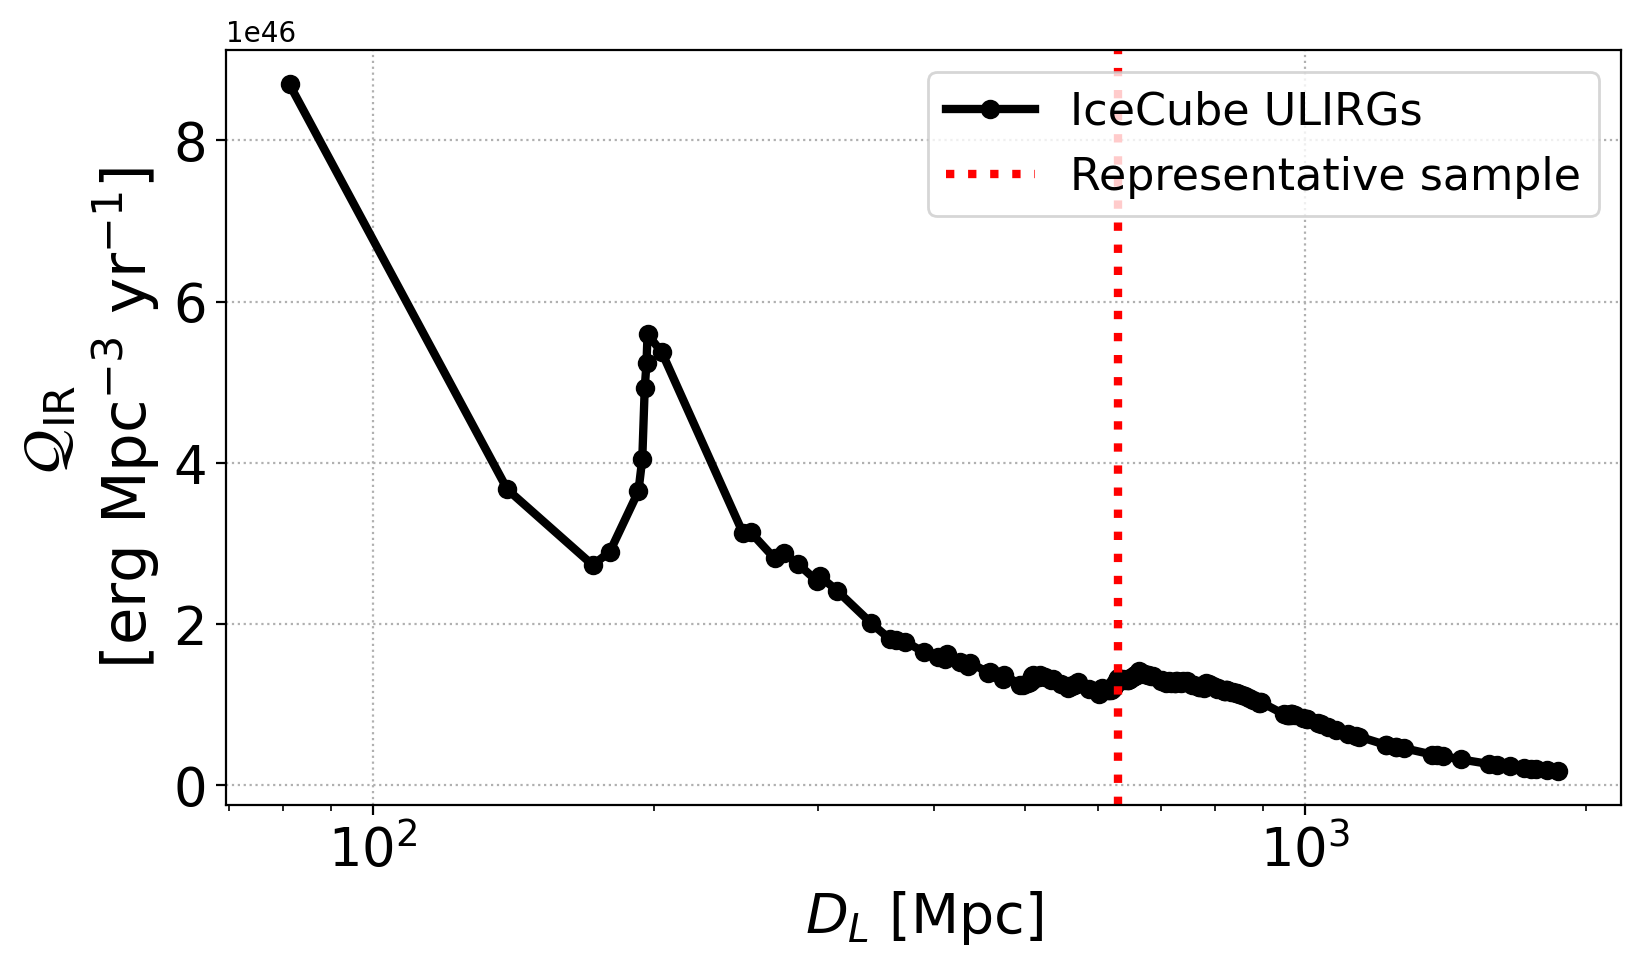

In [6]:
plt.figure(figsize=(9,5),dpi=200)

plt.plot(data.sort_values(by = 'distance')['distance'].values,diff,c = 'k', marker = 'o',ls = '-',label = 'IceCube ULIRGs',linewidth =3)
plt.axvline(x = 630,c='red',ls='dotted',lw=3,label='Representative sample')
plt.ylabel('$\\mathcal{Q}_{\\mathrm{IR}}$ \n [erg Mpc$^{-3}$ yr$^{-1}$]', fontsize = 22)
plt.legend(fontsize = 16,loc='upper right')
plt.xlabel('$D_L$ [Mpc]',fontsize = 20)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.grid(ls ='dotted')
plt.xscale('log')

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

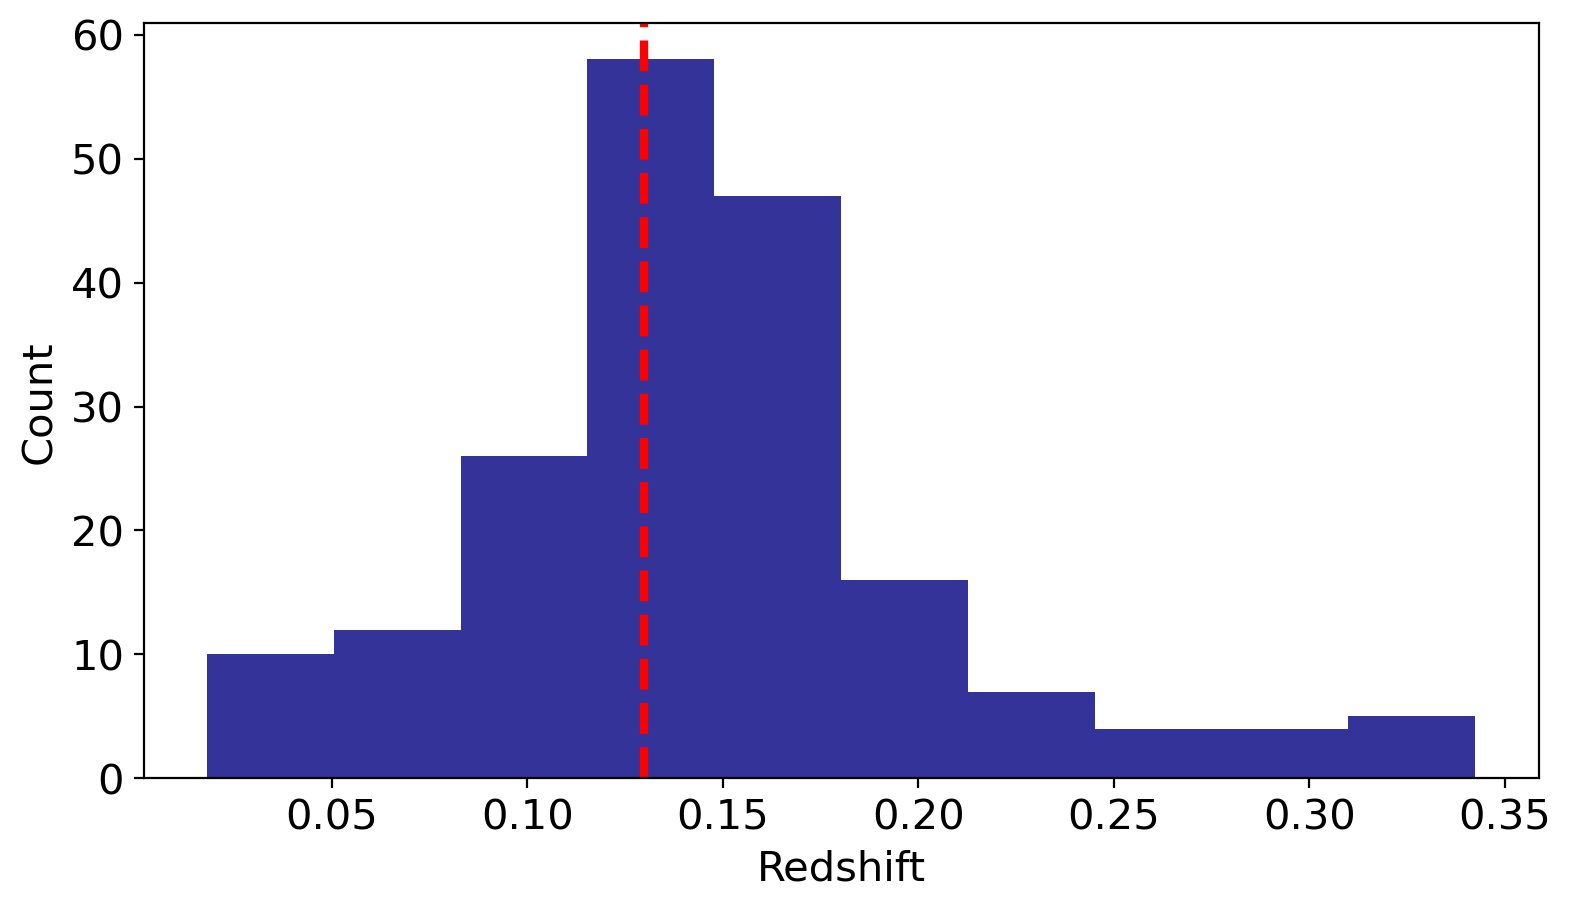

In [7]:
plt.figure(figsize=(9,5),dpi=200)

plt.hist(data['redshift'],color='navy',alpha = 0.8)
plt.axvline(x=0.13,color = 'red',ls ='dashed',lw = 3)
plt.xlabel('Redshift',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [8]:
def pl(E,E0,phi0,gamma):
    return phi0*pow(E/E0,-gamma+2)
pl = np.vectorize(pl)

In [9]:
QIR= QIR(630,df=data)[0]
Erange_g2 = np.logspace(np.log10(10*1e3),np.log10(1e4*1e3),12) 
Erange_g25 = np.logspace(np.log10(1*1e3),np.log10(5*1e5),12) 
Erange_g3 = np.logspace(np.log10(10**2.6),np.log10(10**4.8),12)
#20*1e3,20*1e6
#note the Emin and Emax
ul_gamma2 = np.ones(len(Erange_g2))*4e-12
ulirg_predic_g2 = [nu_flux(E,eta_tot = 0.0018,xiz = 3.4,alpha= 2., QIR = QIR, 
                        fpp = 1.,Emin=1e3, Emax=60*1e6) for E in Erange_g2]

ulirg_predic_g25 = [nu_flux(E,eta_tot = 0.0018,xiz = 3.4,alpha= 2.5, QIR = QIR, 
                        fpp = 1.,Emin=1e3, Emax=60*1e6) for E in Erange_g25]

ulirg_predic_g3 = [nu_flux(E,eta_tot = 0.0018,xiz = 3.4,alpha= 3, QIR = QIR, 
                        fpp = 1.,Emin=1e3, Emax=60*1e6) for E in Erange_g3]

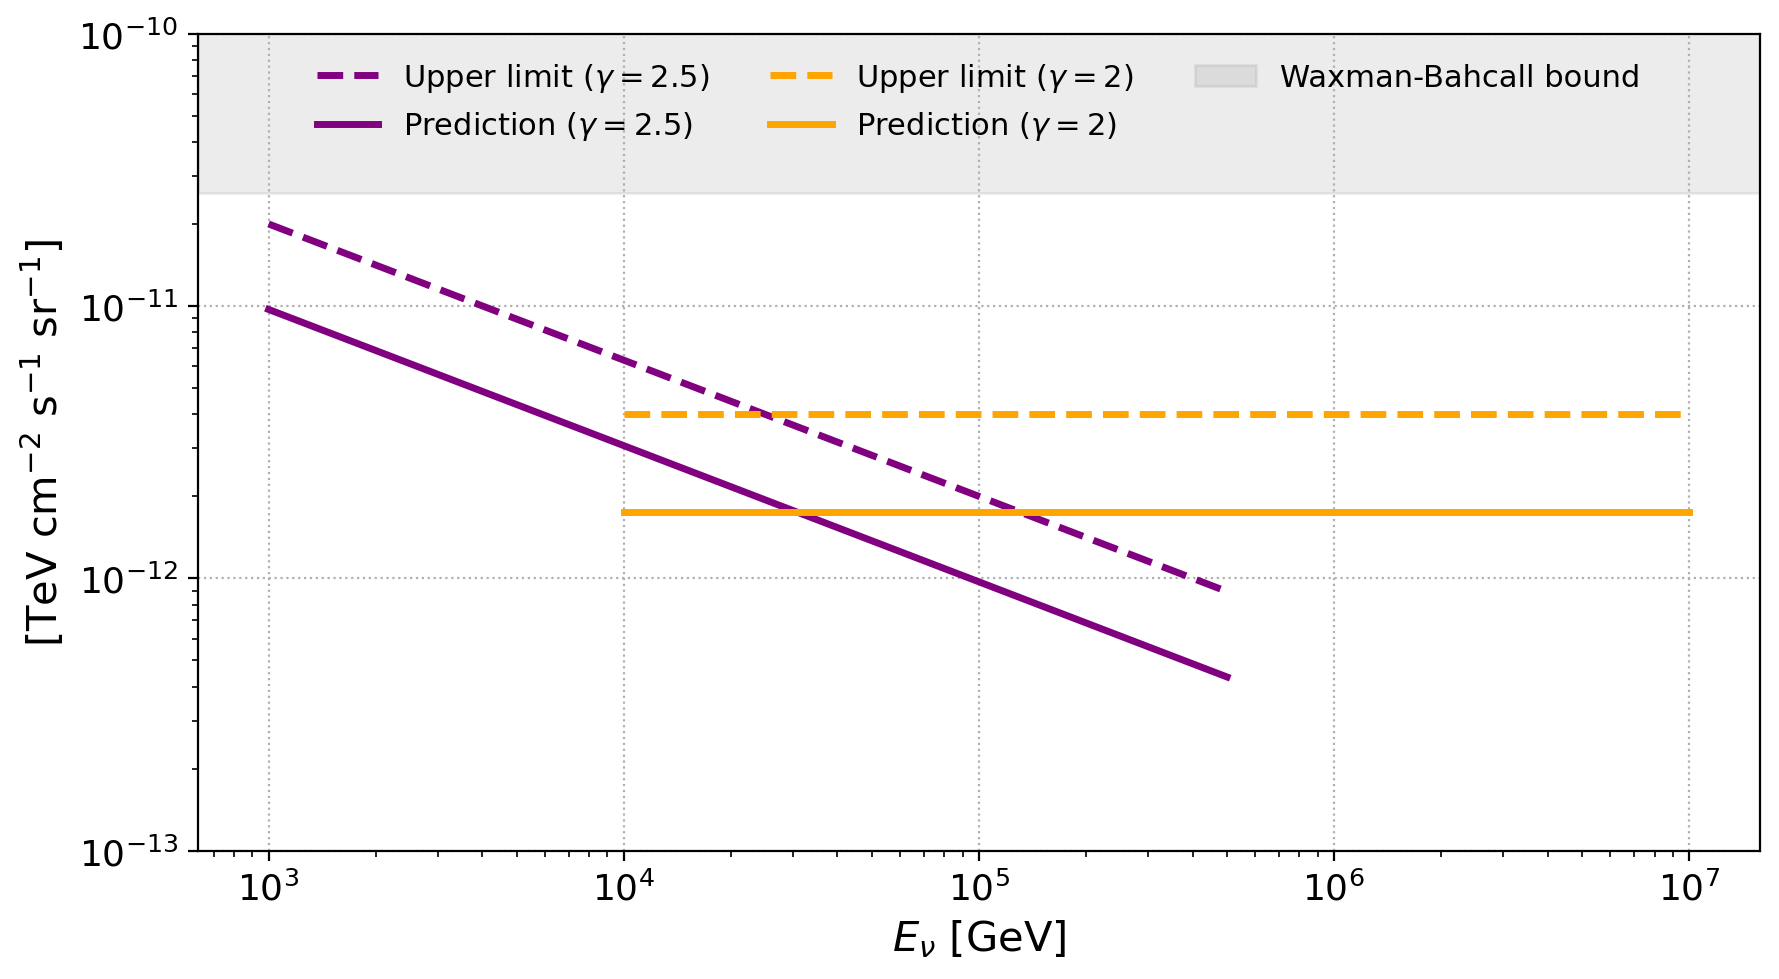

In [10]:
plt.figure(figsize=(9, 5), dpi=200)

# Plot gamma = 2.5
plt.plot(Erange_g25, pl(Erange_g25, 1e3, 2e-11, 2.5), 
         linestyle='dashed', color='purple', lw=2.5, 
         label='Upper limit ($\\gamma = 2.5$)')
plt.plot(Erange_g25, ulirg_predic_g25, 
         color='purple', lw=2.5, 
         label='Prediction ($\\gamma=2.5$)')

# Plot gamma = 2
plt.plot(Erange_g2, ul_gamma2, 
         linestyle='dashed', color='orange', lw=2.5, 
         label='Upper limit ($\\gamma = 2$)')
plt.plot(Erange_g2, ulirg_predic_g2, 
         color='orange', lw=2.5, 
         label='Prediction ($\\gamma=2$)')


# Waxman-Bahcall bound
plt.axhspan(2 * 1e-11 * 1.3, 5e-7, 
            alpha=0.15, color='grey', label='Waxman-Bahcall bound')

# Grid and axes
plt.grid(ls='dotted')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-13, 1e-10)
plt.xlabel('$E_\\nu$ [GeV]', fontsize=15)
plt.ylabel('[TeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]', fontsize=15)

# Ticks
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Legend
plt.legend(fontsize=11, loc='upper center', ncol=3, frameon=False)

plt.tight_layout()
plt.show()


In [11]:
print('ULIRG flux: ', nu_flux(0,eta_tot = 0.0018,xiz = 3.4,alpha= 2., QIR = QIR, 
                        fpp = 1.,Emin=20*1e3, Emax=20*1e6)*1e3,' in GeV cm-2 s-1 sr-1')

ULIRG flux:  2.799626641358329e-09  in GeV cm-2 s-1 sr-1
